# EDA

## Extract MySQL DB 

In [2]:
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Insert Database connection details
user = 'root'
password = '1234567890'
host = 'localhost'
port = 3306 
database = 'nba_database'

# Create connection string
connection_string = f'mysql+pymysql://{user}:{password}@{host}:{port}/{database}'

# Create SQLAlchemy engine
engine = create_engine(connection_string)

In [ ]:
# Define the table name
table_name = 'betting_and_game_table'

# Query the database and load data into a DataFrame
df = pd.read_sql(f'SELECT * FROM {table_name};', con=engine)

# Set the display options to show all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the DataFrame
display(df)

In [ ]:
print(df['GAME_DATE'].min())
print(df['GAME_DATE'].max())

The data spans from the 2007-2008 season to the 2021-2022 season.

## 1. Distribution of Key Metrics

We analyzed the distribution of various game statistics such as points scored, rebounds, assists, and more. This analysis helped us understand the typical performance metrics for winning and losing teams. By visualizing these metrics, we can identify patterns and differences in performance that are indicative of game outcomes. The focus was on:

- Points Scored: Comparison of points scored by winning vs. losing teams.
- Rebounds: Distribution of total rebounds for teams in different game outcomes.
- Assists: Analysis of assists made by winning and losing teams.
- Turnovers: Examination of turnover counts and their impact on game results.
- Field Goal Percentage: Insights into shooting efficiency for winning vs. losing teams.

### Summary Statistics for Home Team and Away Team Performance

In [ ]:
# Descriptive statistics for home team performance
home_metrics = df[['PTS_HOME', 'FG_PCT_HOME', 'FG3_PCT_HOME', 'FT_PCT_HOME', 'REB_TOTAL_HOME', 'AST_HOME', 'STL_HOME', 'BLK_HOME', 'PF_HOME', 'TOV_HOME', 'EFG_HOME', 'NetRtg_Home', 'Defensive_Efficiency_HOME', 'Offensive_Efficiency_HOME']]
home_summary = home_metrics.describe()
home_summary

In [ ]:
# Descriptive statistics for away team performance
away_metrics = df[['PTS_AWAY', 'FG_PCT_AWAY', 'FG3_PCT_AWAY', 'FT_PCT_AWAY', 'REB_TOTAL_AWAY', 'AST_AWAY', 'STL_AWAY', 'BLK_AWAY', 'PF_AWAY', 'TOV_AWAY', 'EFG_AWAY', 'NetRtg_Away', 'Defensive_Efficiency_AWAY', 'Offensive_Efficiency_AWAY']]
away_summary = away_metrics.describe()
away_summary

**Home-Court Advantage:** The higher mean values for home teams performance metrics suggest a significant home-court advantage. However, the difference is relatively small, suggesting that away teams can still compete effectively and win against home team.

We will visualize the distributions of these metrics using histograms for both home and away teams.

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns

# Define key metrics for both home and away teams
metrics = {
    'Total Points': ('PTS_HOME', 'PTS_AWAY'),
    'Field Goal Percentage': ('FG_PCT_HOME', 'FG_PCT_AWAY'),
    'Three-Point FG Percentage': ('FG3_PCT_HOME', 'FG3_PCT_AWAY'),
    'Free Throw Percentage': ('FT_PCT_HOME', 'FT_PCT_AWAY'),
    'Rebounds': ('REB_TOTAL_HOME', 'REB_TOTAL_AWAY'),
    'Assists': ('AST_HOME', 'AST_AWAY'),
    'Steals': ('STL_HOME', 'STL_AWAY'),
    'Blocks': ('BLK_HOME', 'BLK_AWAY'),
    'Fouls': ('PF_HOME', 'PF_AWAY'),
    'Turnovers': ('TOV_HOME', 'TOV_AWAY'),
    'Effective Field Goal Percentage': ('EFG_HOME', 'EFG_AWAY'),
    'Net Rating': ('NetRtg_Home', 'NetRtg_Away'),
}

# Plot the distribution for each metric
plt.figure(figsize=(18, 24))

for i, (metric_name, (home_col, away_col)) in enumerate(metrics.items(), 1):
    plt.subplot(6, 2, i)
    sns.histplot(df[home_col], kde=True, color='blue', label='Home', alpha=0.6)
    sns.histplot(df[away_col], kde=True, color='red', label='Away', alpha=0.6)
    plt.title(f'Distribution of {metric_name}')
    plt.xlabel(metric_name)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

The histograms consistently show that home teams tend to perform better across various metrics, reinforcing the idea of a home-court advantage.

### Home vs Away Win Rates
To explore more about the performance of home and away teams, we will compare their win percentages.

In [ ]:
# Calculate the percentage of wins
home_win_percentage = df['HomeWin'].mean()
away_win_percentage = 1 - home_win_percentage

# Print the results
print(f"Home Win Percentage: {home_win_percentage:.2f}")
print(f"Away Win Percentage: {away_win_percentage:.2f}")

# Data for pie chart
labels = ['Home Wins', 'Away Wins']
sizes = [home_win_percentage, away_win_percentage]
colors = ['#4CAF50', '#FFC107']

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Home vs. Away Win Percentage')
plt.show()

The pie chart clearly shows that home teams win more frequently than away teams, with a home win percentage of 58.5% compared to an away win percentage of 41.5%.

In [ ]:
betting_metrics = df[['POINT_DIFF', 'HomeSpread_AtClose', 'TOTAL_PTS', 'Over_AtClose', 'HomeML', 'AwayML', 'HomeML_Prob', 'AwayML_Prob']]
betting_metrics_summary = betting_metrics.describe()
betting_metrics_summary

- **Point Difference:** The average point difference between teams is 2.66, suggesting that home teams generally win by a small margin. The wide range of point differences (from -57 to 73) indicates that while some games are closely contested, others can be won by large margins.

- **Home Spread:** TThe mean home spread at close is -2.82, indicating that home teams are often given a negative spread, meaning they are expected to win by a certain margin.

- **Total Points and Over/Under:** The mean over/under at close is 206.22, closely aligning with the mean total points scored (206.55). This suggests that the over/under lines set by bookmakers are generally accurate. 

- **Money Line/Money Line Probability:** The mean home money line at close is -262.64, indicating that home teams are generally favored to win. This is further supported by the higher home money line probability (0.72), suggesting that bettors and bookmakers expect home teams to win more often.

In [ ]:
# Calculate and visualize the average moneyline probability for home and away teams
moneyline_avg = df[['HomeML_Prob', 'AwayML_Prob']].mean()
moneyline_avg.plot(kind='bar', color=['blue', 'red'])
plt.title('Average Moneyline Probability for Home and Away Teams')
plt.ylabel('Average Probability')
plt.xticks(rotation=0)
plt.show()

### Distribution of Games per Season
The table and bar chart show the number of games played each season from 2007 to 2021.

In [ ]:
# Distribution of Games per Season 
season_distribution = df['SEASON_ID'].value_counts().reset_index()
season_distribution.columns = ['Season', 'Number of Games']
season_distribution = season_distribution.sort_values(by='Number of Games', ascending=False).reset_index(drop=True)

# Display the tables
print("Distribution of Games per Season:")
print(season_distribution)

# Visualization
plt.figure(figsize=(10, 5))
sns.countplot(y='SEASON_ID', data=df, palette='viridis')
plt.title('Distribution of Games per Season')
plt.xlabel('Season')
plt.ylabel('Number of Games')
plt.show()

The bar chart provides a clear visual representation of the distribution of games per season from 2007 to 2021, highlighting trends, and potential impacts of external factors. 
- There are periods where the number of games remains relatively stable, indicating consistency in scheduling. For example, the seasons from 2007 to 2018 (excluding 2011) show a steady number of games, suggesting a stable league structure during these years.

- Fewer games (990) is observed in 2011 due to a lockout caused by a dispute between the NBA owners and players over the terms of a new collective bargaining agreement (CBA). The lockout led to the cancellation of the entire preseason and a significant portion of the regular season

- A significant drop in the number of games is observed in the 2019-2020 season. This is likely due to the COVID-19 pandemic, which caused disruptions in sports schedules worldwide. The pandemic led to the suspension of games, shortened seasons, and changes in league formats to accommodate health and safety protocols.

### Distribution of Games per Team 

In [ ]:
# Counting games played by each team as home and away teams
home_games_per_team = df['TEAM_NAME_HOME'].value_counts()
away_games_per_team = df['TEAM_NAME_AWAY'].value_counts()

# Combine home and away games
total_games_per_team = home_games_per_team.add(away_games_per_team, fill_value=0).sort_values(ascending=False)

print("\nDistribution of Games per Team:")
print(total_games_per_team)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(y=total_games_per_team.index, x=total_games_per_team.values, palette='coolwarm')
plt.title('Distribution of Games per Team')
plt.xlabel('Team')
plt.ylabel('Number of Games')
plt.xticks(rotation=90)
plt.show()

- Most teams have played a similar number of games, with values ranging from 1133 to 1145. This indicates a relatively balanced schedule across the league, ensuring fairness in the number of games played by each team.

- Teams like the Portland Trail Blazers, Milwaukee Bucks, and Memphis Grizzlies are at the top of the list with 1145 games each. This suggests these teams have been consistently active over the period considered.

## 2. Correlation Analysis

We examined correlations between different statistical measures to identify which metrics had the most influence on winning games. This included looking at various performance metrics and how they interrelate. Key areas of focus included:

- Team Shooting Accuracy: Analysis of field goal percentage, three-point shooting, and free throw efficiency.
- Turnovers and Assists: Relationship between turnovers, assists, and game results.
- Effective Metrics: Effective field goal percentage and other advanced metrics.


In [ ]:

#correlation analysis for shooting accuracy 

shooting_metrics = ['FG_PCT_HOME', 'FG_PCT_AWAY', 'FG3_PCT_HOME', 'FG3_PCT_AWAY', 'FT_PCT_HOME', 'FT_PCT_AWAY', 'EFG_HOME', 'EFG_AWAY', 'HomeWin', 'AwayWin']
corr_shooting = df[shooting_metrics].corr()

#visualization 

plt.figure(figsize=(10,8))
sns.heatmap(corr_shooting, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Shooting Accuracy and Game Outcomes')
plt.show()

#correlation analysis for turnovers and assists

turnover_assists_metrics = ['AST_HOME', 'AST_AWAY', 'TOV_HOME', 'TOV_AWAY', 'AST_TOV_RATIO_HOME', 'AST_TOV_RATIO_AWAY', 'HomeWin', 'AwayWin']
corr_turnover_assists = df[turnover_assists_metrics].corr()

#visualization

plt.figure(figsize=(10,8))
sns.heatmap(corr_turnover_assists, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Turnovers, Assists, and Game Outcomes')
plt.show()

# correlation Analysis for advanced metrics
advanced_metrics = ['Offensive_Efficiency_HOME', 'Offensive_Efficiency_AWAY', 'Defensive_Efficiency_HOME', 'Defensive_Efficiency_AWAY',
                    'ORtg_Home', 'ORtg_Away', 'DRtg_Home', 'DRtg_Away', 'NetRtg_Home', 'NetRtg_Away', 'HomeWin', 'AwayWin']
corr_advanced = df[advanced_metrics].corr()

# visualization
plt.figure(figsize=(10, 8))

sns.heatmap(corr_advanced, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Advanced Metrics and Game Outcomes')
plt.show()

Performing correlation analysis between several game statistics and game outcome, produced three heatmaps, each represents the relationship between shooting efficiency, assist to turnover ratio, and advanced metrics to the outcome of games respectively. 

A positive correlation means that as one variable increases/ decreases, the other variable also does the same. On the other hand, a correlation of 0 demonstrates a neutral relationship. Lastly, a negative correlation represents an inverse relationship such that as one variable increases/ decreases, the other variable goes the opposite.

The first heatmap shows the relationship amongst several metrics for shooting efficiency and their outcome to the game's winner. Some of the few notable cells include: 

* FG_PCT_HOME and WL_Home has a correlation score of 0.44, a positive correlation. Hence, a home team who shot efficiently are more likely to win the game, and vice versa for the away team. 

* FG3_PCT_HOME/AWAY and FG_PCT_HOME/AWAY both shows a positive relationship, 0.47 and 0.46 respectively. Their score means that a high overall field goal percentage, likely means a good three-point shooting night also. 

* FT_PCT_HOME/AWAY does not have much of an impact on whether a team wins or loses the game, only having a correlation score of 0.095. 

The second heatmap shows the relationship of game assists, turnovers, assist to turnover ratio, and game outcomes. A few notable cells are: 

* AST_HOME and AST_AWAY both have a positive correlation with AST_TOV_RATIO, with 0.54 and 0.59 respectively. It means that as the assist numbers of a team increases, the ratio between assists and turnovers also increases.  

* TOV_HOME and TOV_AWAY both have a negative correlation with AST_TOV_RATIO, with -0.73 and -0.74 respectively. As the number of turnovers committed by a team increases, their assist to turnover ratio decreases. 

* AST_TOV_RATIO has a positive correlation relative to the game's outcome, with a score of 0.22. It means that a team who moves around the ball while minimizing their turnovers, are more likely to win a game. However, the heatmap also shows that there is a higher positive correlation score between AST_HOME/AST_AWAY to the game's outcome, with a score of 0.31. It can be interpreted as higher assist numbers likely leading to wins, spite of the turnover numbers, as higher assist numbers mean that the offense is active, coordinated, and effective.

The third heatmap shows the relationship between gvarious efficiency metrics such as Offensive Rating, Defensive Rating, Net Rating, and game outcomes. The analysis yielded results that we can use to gain insight into how these metrics affect the game. Here's our takeaways: 

* Offensive Rating and Defensive Rating  has a moderate positive relationship with game outcomes ranging from 0.23 to 0.25. This suggest that although playing good on either side does impact winning, it still requires a balanced performance from both ends to ultimately shift a game's outcome towards your way. 

* The Net Rating's strong positive correlation with game outcome supports our previous claim. Net Rating has a 0.38 score relative to the home or away team winning. A higher net rating suggests that a team is able to maximize their offensive opportunities, while minizing their opponents'. 


In [ ]:
#betting features and outcome correlation analysis 

betting_metrics = ['HomeSpread_AtClose','HomeSpread_AtOpen', 'Over_AtClose', 'Over_AtOpen', 'HomeML', 'AwayML', 'HomeML_Prob', 'AwayML_Prob', 'HomeWin', 'AwayWin']
corr_betting = df[betting_metrics].corr()

#visualization of correlation analysis between betting features and game outcome

plt.figure(figsize=(10,8))
sns.heatmap(corr_betting, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Betting Features and Game Outcomes')
plt.show()

The correlation analysis earlier were between team statisics and game outcomes. However, it is also important that we understand how pre-game odds and other betting features affect the game's outcome. 

Specifically, the correlation heatmap above, represents the relationship between features such as spread diff, moneyline probabilities, and game outcomes. The analysis were able to identify several important relationships such as: 

## 1. Moneyline Probabilities and Game Outcomes : 

* HomeML_Prob and WL_HOME has a correlation of 0.39,indicating a moderate positive relationship between the implied probability of the home team winning (as indicated by the home moneyline) and the actual outcome of the game (home team win). This suggests that higher implied probabilities for the home team correlate with an increased likelihood of the home team winning.

* AwayML_Prob and WL_AWAY shows a correlation of 0.41 which means a similar moderate positive relationship between the implied probability of the away team winning and the actual outcome (away team win). This suggests that betting markets moderately predict the likelihood of an away team win.

## 2. Moneyline Odds and Probabilities: 

* HomeML and AwayML_Prob demonstrates a strong positive correlation of 0.68 which means that the home moneyline odds are closely related to the implied probability of the away team winning. This relationship highlights how betting markets adjust the odds of one team in response to the perceived strength of the other.

* AwayML and HomeML_Prob is an even stronger correlation of 0.78 which reflects a similar relationship, but in the opposite direction. This strong correlation suggests that the odds for one team are heavily influenced by the implied probability of the opposing team's success.

## 3. Spread and Game Outcomes: 

* HomeSpread_AtOpen and WL_AWAY has a correlation of 0.18 which indicates a weak positive relationship between the opening home spread and the likelihood of the away team winning. This suggests that the initial spread set for the home team has limited predictive power for away wins.

* HomeSpread_AtClose and WL_AWAY is a much stronger correlation of 0.41 indicates that the closing spread, after adjustments by the market, has a moderate positive relationship with away team wins. This suggests that the market's adjustments in the spread throughout the betting period better reflect the true likelihood of the away team winning.

## 4. Spread and Moneyline Relationships: 

* HomeSpread_AtClose and HomeML: The strong positive correlation of 0.73 suggests that the closing spread is closely aligned with the home team's moneyline odds. This relationship shows that the market strongly ties the perceived point advantage (spread) of the home team to the direct odds of the team winning outright.

* HomeSpread_AtClose and AwayML_Prob is An even stronger correlation of 0.98 shows that the closing home spread is almost perfectly aligned with the implied probability of the away team winning. This highlights how the spread at close is a critical factor in determining the betting market's perception of the away team's chances.

* HomeSpread_AtOpen and HomeML/AwayML_Prob is a weaker positive correlations of 0.33 and 0.45 between the opening spread and the home moneyline odds/implied away probability indicate that initial market predictions are less reliable compared to the adjusted spreads and odds as betting progresses.

## 5. Negative Correlations: 

* HomeSpread_AtClose and AwayML: The strong negative correlation of -0.87 between the closing home spread and the away moneyline suggests that as the home team is favored more in the spread (a lower spread), the odds for the away team winning increase (a higher away moneyline).

* HomeSpread_AtClose and HomeML_Prob is an even stronger negative correlation of -0.96 indicates that the closing home spread is inversely related to the implied probability of the home team winning. This further underscores the market's adjustment process, where a more favorable spread for the home team corresponds to a lower perceived risk of them losing.

* HomeSpread_AtOpen and AwayML/HomeML_Prob has a weaker negative correlations of -0.4 and -0.44 for the opening spread with away moneyline and home moneyline probability indicate that initial spread settings are less inversely aligned with these metrics compared to the closing spread, reinforcing the idea that market adjustments over time lead to more accurate betting lines.



In [ ]:
#correlation analysis of win streak, rolling averages and game outcome

streak_and_stats_metrics = [
    'HomeWinStreak', 'AwayWinStreak', 
    'Home_PTS_RollAvg', 'Away_PTS_RollAvg', 
    'Home_REB_RollAvg', 'Away_REB_RollAvg', 
    'HomeWin', 'AwayWin'
]

# Compute the correlation matrix
corr_streak_and_stats = df[streak_and_stats_metrics].corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_streak_and_stats, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Streaks, Rolling Averages, and Game Outcomes')
plt.show()

This correlation analysis are between time based features such as win streaks, rolling averages of a team, and the outcome of games.

From the analysis, it produced interesting results such as: 

* HomeWinStreak and WL_HOME has a correlation coefficient of 0.13, indicating a weak positive relationship. While the correlation is not very strong, it does suggest that maintaining a win streak at home can have a positive impact on the team’s performance and their likelihood of winning future games.

* Home_PTS_RollAvg and WL_HOME has a correlation of 0.21, showing a weak positive relationship. This implies that while higher average points scored by the home team over recent games are somewhat associated with winning, the impact is not particularly strong.

* Away_PTS_RollAvg and WL_AWAY similarly has acorrelation of 0.21, suggesting that the away team's rolling average points have a weak positive relationship with their likelihood of winning games.

* Home_REB_RollAvg and WL_HOME shows a correlation of 0.13. The relationship between the home team's rolling average rebounds and their game outcomes is very weak. This indicates that rebounding performance, on average, is not a strong predictor of whether the home team will win.

* Away_REB_RollAvg and WL_AWAY correlation is 0.15, also indicating a very weak positive relationship. Like with the home team, the away team's rebounding trends do not strongly influence the outcome of the game.

In [ ]:
#correlation analysis for defensive statistics 

defensive_statistics = ['STL_HOME', 'STL_AWAY', 'BLK_HOME', 'BLK_AWAY', 'DREB_HOME', 'DREB_AWAY','REB_TOTAL_HOME', 'REB_TOTAL_AWAY','HomeWin', 'AwayWin']
corr_defense = df[defensive_statistics].corr()

# visualization

plt.figure(figsize=(10,8)) 

sns.heatmap(corr_defense, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Defensive Statistics and Game Outcomes')
plt.show()

The final correlation analysis are between defensive statistics between blocks, steals, rebounds, and game outcomes. The analysis produced interesting results, here's our takeaways: 

* STL_HOME/AWAY and BLK_HOME/AWAY has a weak positive relationship with the outcome of games. This indicate that although a number of steals and block indicate good defensive possessions, it does not tell the whole story of how good defense affects the outcome of games. 

* DREB_HOME and DREB_AWAY has a relatively strong positive correlation with the outcome of games, with 0.32 and 0.35 respectively. To quote SlamDunk, "The team who controls the rebound, controls the game". It indicates that teams with higher defensive rebound play better defense and create more opportunities to score on the offensive end. 


## 3. Time Series Analysis

Given the dynamic nature of sports, where team performance can vary significantly from season to season, we analyzed the data across different time periods to capture any temporal effects on game outcomes. This analysis aimed to:

- Seasonal Trends: Observe how team performance metrics change over different seasons.
- Performance Variations: Identify any trends or patterns in performance metrics throughout the season.
- Rolling Averages: Use rolling averages to smooth out performance data and capture trends over time.

### 3.1. Seasonal Trends

To observe how team performance metrics change over different seasons, we can create multiple plots to visualize different aspects of performance:

Average Points Scored Per Season (Home vs Away)

This plot shows the average points scored by home and away teams for each season.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'GAME_DATE' is a datetime type and 'SEASON_ID' is categorical or similar
df['GAME_DATE'] = pd.to_datetime(df['GAME_DATE'])

# Group by season and calculate average points scored per game
seasonal_points = df.groupby('SEASON_ID').agg({
    'PTS_HOME': 'mean',
    'PTS_AWAY': 'mean'
}).reset_index()

plt.figure(figsize=(14, 7))
plt.plot(seasonal_points['SEASON_ID'], seasonal_points['PTS_HOME'], marker='o', label='Home Team Points')
plt.plot(seasonal_points['SEASON_ID'], seasonal_points['PTS_AWAY'], marker='o', label='Away Team Points')
plt.title('Average Points Scored per Season')
plt.xlabel('Season')
plt.ylabel('Average Points Scored')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

**Dip Around 2012-2014:** 
- Both home and away teams experienced a drop in their average points during this period. The home teams' average fell to around 100 points, while away teams dropped to around 96 points.

- This can be attributed to several factors such as changes in defensive strategies of coach, player movements, and injusries, and specially the changes in rules which happened during 2011


**Upward Trend starting from 2014:**
- Starting from 2014, there's a notable upward trend in points scored by home teams, with a significant spike around 2016-2018. By 2020, the average points scored per game by home teams reached 112.

- Similarly, away teams show a sharp rise in points from 2014 onwards, closing the gap between home and away performances. By 2020, away teams were scoring nearly as many points as home teams (around 110 points per game).


**Closing Performance Gap:**
- While home team consistently outperformed away teamn, it can be observed in recent seasons that the gap between the two has narrowed considerably. By the 2020 season, the difference between home and away points is almost negligible.
- This means that away teams are no longer at a significant disadvantage and can compete more evenly with home teams, leading to more unpredictable and exciting matchups.


#### Three-Point Field Goals Attempted per Season (Home vs Away)
This plot shows how three-point field goals attempts have evolved over the years for both home and away teams.

In [ ]:
# Group by Season to calculate averages for each year
season_stats = df.groupby('SEASON_ID').agg({
    'FG3M_HOME': 'mean', 
    'FG3A_HOME': 'mean',
    'FG3_PCT_HOME': 'mean',
    'FG3M_AWAY': 'mean',
    'FG3A_AWAY': 'mean',
    'FG3_PCT_AWAY': 'mean'
}).reset_index()

# Plot Three-Point Attempts (Home vs Away)
plt.figure(figsize=(12, 6))
plt.plot(season_stats['SEASON_ID'], season_stats['FG3A_HOME'], label='Home 3PA', color='blue', marker='o')
plt.plot(season_stats['SEASON_ID'], season_stats['FG3A_AWAY'], label='Away 3PA', color='green', marker='o')

# Customize the plot
plt.title('Three-Point Field Goal Attempts Over Time (Home vs Away)', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average 3PA per Game', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

**Increasing Trend:** 
- Both home and away three-point makes have steadily increased over the seasons from 22008 to 22020. This suggests a general trend in basketball towards a more three-point-oriented style of play.

- This trend suggests a shift in basketball strategy, with teams prioritizing three-point shooting as a key offensive weapon.

**Narrowing Gap:** 
- While the home team has historically made more three-pointers, the gap between home and away makes has narrowed over time. This might indicate that away teams are becoming more effective at shooting from beyond the arc.

#### Three-Point Field Goals Made per Season (Home vs Away)
This plot shows how three-point field goals made have evolved over the years for both home and away teams.

In [ ]:
# Group by Season to calculate averages for each year
season_stats = df.groupby('SEASON_ID').agg({
    'FG3M_HOME': 'mean', 
    'FG3A_HOME': 'mean',
    'FG3_PCT_HOME': 'mean',
    'FG3M_AWAY': 'mean',
    'FG3A_AWAY': 'mean',
    'FG3_PCT_AWAY': 'mean'
}).reset_index()

# Plot Three-Point Made (Home vs Away)
plt.figure(figsize=(12, 6))
plt.plot(season_stats['SEASON_ID'], season_stats['FG3M_HOME'], label='Home 3PM', color='blue', marker='o')
plt.plot(season_stats['SEASON_ID'], season_stats['FG3M_AWAY'], label='Away 3PM', color='green', marker='o')

# Customize the plot
plt.title('Three-Point Field Goals Made Over Time (Home vs Away)', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average 3PM per Game', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

**Increasing Trend:** 
- Both home and away teams have consistently increased their average three-point makes per game over the seasons from 22008 to 22020. This indicates a growing emphasis on three-point shooting as a key offensive strategy in basketball.

- This trend suggests that teams are increasingly prioritizing long-range shooting, which aligns with the observation in professional leagues.


**Improved Away Team Performance:** 
- While home team consistently outperformed away team, it can observed in the recent seasons that the gap between the two has narrowed significantly. This might indicate that away teams are becoming more comfortable and effective at shooting from beyond the arc

#### Average Rebounds Per Season (Home vs Away)

This plot shows the average number of rebounds per game for the home and away teams across seasons.

In [ ]:
# Group by season and calculate average rebounds per game
seasonal_rebounds = df.groupby('SEASON_ID').agg({
    'REB_HOME': 'mean',
    'REB_AWAY': 'mean'
}).reset_index()

plt.figure(figsize=(14, 7))
plt.plot(seasonal_rebounds['SEASON_ID'], seasonal_rebounds['REB_HOME'], marker='o', label='Home Team Rebounds')
plt.plot(seasonal_rebounds['SEASON_ID'], seasonal_rebounds['REB_AWAY'], marker='o', label='Away Team Rebounds')
plt.title('Average Rebounds per Season')
plt.xlabel('Season')
plt.ylabel('Average Rebounds')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

- Both home team and away team rebounds have increased over the years, showing a general upward trend.

- In the latest seasons (2020 onwards), the gap between home and away team rebounds has slightly reduced. While home teams still hold a rebound advantage, away teams have improved their rebounding performance over the years.

- Both home and away teams have experienced fluctuations in their average rebounds per game over the seasons, indicating that rebounding strategies and effectiveness varied over time.

#### Average Field Goal Percentage Per Season (Home vs Away)

This plot displays the average field goal percentage for home and away teams across different seasons.

In [ ]:
# Group by season and calculate average field goal percentage
seasonal_fg_pct = df.groupby('SEASON_ID').agg({
    'FG_PCT_HOME': 'mean',
    'FG_PCT_AWAY': 'mean'
}).reset_index()

plt.figure(figsize=(14, 7))
plt.plot(seasonal_fg_pct['SEASON_ID'], seasonal_fg_pct['FG_PCT_HOME'], marker='o', label='Home Team FG%')
plt.plot(seasonal_fg_pct['SEASON_ID'], seasonal_fg_pct['FG_PCT_AWAY'], marker='o', label='Away Team FG%')
plt.title('Average Field Goal Percentage per Season')
plt.xlabel('Season')
plt.ylabel('Average FG Percentage')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

- **Home Team Advantage:** Home teams consistently have a higher average FG% compared to away teams in most seasons, highlighting the advantage that playing at home can provide. This advantage is reflected in better shooting performance when teams are in familiar environments.

- **Fluctuations in Field Goal Percentage:** The fluctuations in field goal percentages suggest that teams have adopted different shooting strategies over time. This could be influenced by changes in coaching, player personnel, or the overall style of play in the league.

- **Improved Away Team Shooting:** The narrowing gap between home and away field goal percentages indicates that away teams are becoming more effective at shooting, potentially due to improved coaching, player development, or adjustments in game preparation.

#### Visualization of Win Streaks: Home vs. Away
This plot visualizes the win streaks for home and away teams across all games in the dataset. The blue line represents the home team's win streak, while the red line represents the away team's win streak. This visualization helps to understand how home-court advantage impacts win streaks over time.

In [ ]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(14, 7))

# Plot Home and Away Win Streaks
plt.plot(df['GAME_DATE'], df['HomeWinStreak'], label='Home Win Streak', color='blue', linewidth=2)
plt.plot(df['GAME_DATE'], df['AwayWinStreak'], label='Away Win Streak', color='red', linewidth=2)

# Add title, labels, legend, and grid
plt.title('Seasonal Trend of Home vs. Away Win Streaks')
plt.xlabel('Game Date')
plt.ylabel('Win Streak')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


- **Home Team Dominance**: The plot reveals that home teams generally achieve longer win streaks compared to away teams, indicating a possible home-court advantage.

- **Away Team Challenges**: Away teams struggle to maintain long win streaks, with their streaks consistently shorter and clustered near the bottom of the chart.

- **Notable Trends**: A significant peak around 2016 shows an unusually long home win streak, suggesting an exceptional performance by a particular team or during a specific season.

- **Predictive Modeling Implications**: 
  - **Home-Court Advantage**: The consistent longer win streaks at home suggest that home location should be given more weight in predictive models.
  - **Shorter Away Streaks**: The difficulty for away teams to maintain win streaks should be factored into predictions, particularly in games following an away win.

- **Conclusion**: This plot emphasizes the importance of considering the home-court advantage when predicting NBA game outcomes, as home teams are more likely to build and sustain win streaks.


##### Points scored by NBA Teams

These plots visualize the points scored by specific NBA teams (e.g., Los Angeles Lakers, Boston Celtics, Golden State Warriors) over different seasons. The analysis is split between home and away games, allowing us to observe how these teams' performance metrics change across different time periods. Key patterns, such as consistent improvements or declines, are highlighted to understand long-term trends.

**X-axis:** Date  
**Y-axis:** Points Scored  
**Lines:** Separate lines for home and away performances for each team.

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `df` is your dataframe containing the NBA dataset

# Convert 'GAME_DATE' to datetime format
df_copy = df.copy()
df_copy['GAME_DATE'] = pd.to_datetime(df_copy['GAME_DATE'])

# Filter data for specific NBA teams (e.g., 'LAL' for Los Angeles Lakers)
teams = [
    "ATL", "BKN", "BOS", "CHA", "CHI", "CLE", "DAL", "DEN", 
    "DET", "GSW", "HOU", "IND", "LAC", "LAL", "MEM", "MIA", 
    "MIL", "MIN", "NOP", "NYK", "OKC", "ORL", "PHI", "PHX", 
    "POR", "SAC", "SAS", "TOR", "UTA", "WAS"
]

filtered_df = df_copy[(df_copy['TEAM_ABBREVIATION_HOME'].isin(teams)) | (df_copy['TEAM_ABBREVIATION_AWAY'].isin(teams))]

# Calculate the average points per season for home and away teams
filtered_df['SEASON_ID'] = pd.DatetimeIndex(filtered_df['GAME_DATE']).year

# Generalized function to calculate and plot average metrics per season
def plot_avg_metric_per_season(data, team, metric_home, metric_away, ylabel, ax):
    """
    Function to plot average metrics per season for home and away games for a specific team.
    
    Args:
    - data: Filtered dataframe containing NBA data.
    - team: The team abbreviation for which the metric will be plotted.
    - metric_home: The column name for the home team metric (e.g., 'PTS_HOME').
    - metric_away: The column name for the away team metric (e.g., 'PTS_AWAY').
    - ylabel: Label for the y-axis (e.g., 'Points', 'Rebounds').
    - ax: Matplotlib axis object to plot on.
    """
    
    # Filter team data
    team_data = data[(data['TEAM_ABBREVIATION_HOME'] == team) | (data['TEAM_ABBREVIATION_AWAY'] == team)]
    
    # Group by season and calculate average metric for home and away games
    avg_metric_per_season = team_data.groupby('SEASON_ID').agg({
        metric_home: 'mean', 
        metric_away: 'mean'
    }).reset_index()

    # Plot average metric per season for both home and away
    sns.lineplot(data=avg_metric_per_season, x='SEASON_ID', y=metric_home, label=f'{team} Home {ylabel}', ax=ax)
    sns.lineplot(data=avg_metric_per_season, x='SEASON_ID', y=metric_away, label=f'{team} Away {ylabel}', ax=ax)

    ax.set_title(f'{team}: Average {ylabel} Per Season')
    ax.set_xlabel('Season')
    ax.set_ylabel(f'Average {ylabel}')
    ax.legend()
    ax.grid(True)
    plt.xticks(rotation=45)


In [ ]:
# Plot for each team
fig, axs = plt.subplots(len(teams), 1, figsize=(12, 6 * len(teams)), sharex=True)

for i, team in enumerate(teams):
    plot_avg_metric_per_season(filtered_df, team, 'PTS_HOME', 'PTS_AWAY', 'Points',y axs[i])

plt.tight_layout()
plt.show()

### NBA Team Scoring Patterns Over Seasons (2007-2022)

#### ATL (Atlanta Hawks)
The Hawks' home and away scoring patterns are very similar, with a slight tendency for higher scores at home. However, the highest scoring peak at away is around 160 points, which is slightly higher than the home peaks, which reach just over 140 points.


#### BKN (Brooklyn Nets)
The Nets display a more significant difference between home and away games, with home games showing higher scoring peaks, especially in the later years. Home scores often reach around 130 points, while away scores typically stay below this.

#### BOS (Boston Celtics)
The Celtics show higher peaks at home, frequently reaching or exceeding 120 points, while away scores also perform well but tend to be slightly lower. The highest peak for home games reaches around 140 points, showing a noticeable home-court advantage.

#### CHA (Charlotte Hornets)
The Hornets' scoring shows a slight home-court advantage, with home peaks slightly higher, often reaching 130 points. Away scores are generally lower, staying closer to the 120-point range.

#### CHI (Chicago Bulls)
The Bulls have more variable scores, with both home and away scores showing peaks up to around 130 points. Home games tend to edge out away games, particularly in the middle seasons.

#### CLE (Cleveland Cavaliers)
Cleveland shows a noticeable home-court advantage, particularly during the LeBron James era, where home scores frequently hit or exceed 130 points. Away scores are also high but generally a bit lower, peaking around 125 points.

#### DAL (Dallas Mavericks)
Dallas shows a consistent home-court advantage with home scores reaching up to 130 points, while away scores are generally lower but still strong, often exceeding 120 points.

#### DEN (Denver Nuggets)
The Nuggets' scoring is consistently high at home, often reaching 130 points, with a clear home-court advantage. Away scores are slightly lower but still strong, frequently exceeding 120 points.

#### DET (Detroit Pistons)
Detroit’s scores are generally consistent between home and away games, with peaks just above 120 points. There’s no significant difference between home and away games in terms of peaks.

#### GSW (Golden State Warriors)
The Warriors show a strong home-court advantage, especially from the 2014-2015 season onwards. Home scores frequently exceed 130 points, while away scores are slightly lower but still strong, often hitting 120 points.

#### HOU (Houston Rockets)
Houston displays high-scoring games both at home and away, with home scores peaking slightly higher, frequently reaching around 130 points. Away scores are just slightly lower, typically around 125 points.

#### IND (Indiana Pacers)
Indiana shows a slight home-court advantage, with home peaks often hitting 120-130 points, while away scores tend to be a bit lower, staying just under 120 points.

#### LAC (Los Angeles Clippers)
The Clippers' scoring is fairly consistent, with home games showing slightly higher peaks, particularly during the "Lob City" era. Scores at home frequently reach 130 points, while away scores are typically closer to 120 points.

#### LAL (Los Angeles Lakers)
The Lakers exhibit a moderate home-court advantage, with home scores often reaching around 130 points. Away scores are slightly lower, typically staying around 120-125 points.

#### MEM (Memphis Grizzlies)
Memphis shows consistent scoring, with slightly higher peaks at home, often reaching around 120-130 points. Away scores are just slightly lower, indicating a slight home-court advantage.

#### MIA (Miami Heat)
Miami displays a slight home-court advantage, with home scores frequently hitting around 130 points, particularly during the "Big Three" era. Away scores are slightly lower, typically staying around 120-125 points.

#### MIL (Milwaukee Bucks)
The Bucks exhibit a balanced scoring pattern with a slight home-court advantage. Home scores frequently peak around 130 points, while away scores are slightly lower, typically around 125 points.

#### MIN (Minnesota Timberwolves)
Minnesota shows consistent scoring with slight peaks in home games, often reaching around 120-130 points. Away scores are generally lower, typically staying around 120 points.

#### NOP (New Orleans Pelicans)
The Pelicans display consistent scoring with slight home-court advantages, with home scores peaking around 130 points. Away scores are slightly lower, generally staying just below 125 points.

#### NYK (New York Knicks)
The Knicks exhibit balanced scoring patterns with slight peaks at home, often reaching around 120-125 points. Away scores are similar but generally a bit lower.

#### OKC (Oklahoma City Thunder)
Oklahoma City shows balanced scoring with slight peaks at home, often reaching around 130 points during the Durant-Westbrook era. Away scores are slightly lower, typically around 125 points.

#### ORL (Orlando Magic)
Orlando's scoring is fairly consistent between home and away games, with slight peaks at home often reaching around 120-125 points. Away scores are generally close but slightly lower.

#### PHI (Philadelphia 76ers)
Philadelphia exhibits balanced scoring with slight peaks at home, often reaching around 130 points in recent seasons. Away scores are slightly lower, typically around 125 points.

#### PHX (Phoenix Suns)
The Suns show consistent scoring with a slight home-court advantage, especially in the 2020-2022 seasons where home scores often exceed 130 points. Away scores are slightly lower, typically around 125 points.

#### POR (Portland Trail Blazers)
Portland exhibits consistent scoring with a slight home-court advantage. Home scores often reach around 130 points, while away scores are typically around 125 points.

#### SAC (Sacramento Kings)
Sacramento shows consistent scoring patterns with slight peaks in home games, often reaching around 120-125 points. Away scores are slightly lower, typically staying just below 120 points.

#### SAS (San Antonio Spurs)
The Spurs exhibit balanced scoring across both home and away games, with slight peaks at home often reaching around 130 points, particularly during their championship seasons. Away scores are slightly lower, typically around 125 points.

#### TOR (Toronto Raptors)
Toronto displays consistent scoring with slight peaks at home, particularly in the 2019 championship season, where home scores often reach around 130 points. Away scores are slightly lower, typically around 125 points.

#### UTA (Utah Jazz)
Utah shows balanced scoring between home and away games, with slight peaks at home often reaching around 130 points. Away scores are slightly lower, typically around 125 points.

#### WAS (Washington Wizards)
Washington exhibits consistent scoring with slight peaks at home, often reaching around 120-125 points. Away scores are similar but generally a bit lower, indicating a slight home-court advantage.


#### Visualization of Win Streaks: Each Specific NBA Team
This plot visualizes the win streaks for each NBA team across the dataset. The win streaks for home games are represented by solid lines, and away games are represented by dashed lines. This visualization helps to identify team-specific patterns in win streaks, which can be used for predicting future performance.

In [ ]:
import matplotlib.pyplot as plt

# Get the list of unique teams
teams = df['TEAM_ABBREVIATION_HOME'].unique()

# Loop through each team and create a plot
for team in teams:
    # Filter the data for the current team
    team_data = df[(df['TEAM_ABBREVIATION_HOME'] == team) | (df['TEAM_ABBREVIATION_AWAY'] == team)]
    
    # Set up the figure
    plt.figure(figsize=(14, 7))
    
    # Plot win streaks for the current team
    plt.plot(team_data['GAME_DATE'], team_data['HomeWinStreak'], label=f'{team} Home Win Streak')
    plt.plot(team_data['GAME_DATE'], team_data['AwayWinStreak'], label=f'{team} Away Win Streak', linestyle='--')
    
    # Add title, labels, legend, and grid
    plt.title(f'Seasonal Trend of Win Streaks for {team}')
    plt.xlabel('Game Date')
    plt.ylabel('Win Streak')
    plt.legend(loc='upper left')
    plt.grid(True)
    
    # Show the plot
    plt.show()

- **Home vs. Away Success:** Most teams tend to have more success at home than away, as evidenced by the fact that the home win streak lines generally sit above the away win streak lines.

- **Seasonal Fluctuations:** The graphs reveal that win streaks can ﬂuctuate signiﬁcantly throughout the season. Some teams experience extended periods of dominance, while others face more inconsistent performance. For example, the Boston Celtics (BOS) had a particularly strong home win streak in the early 2010s, while the Golden State Warriors (GSW) have consistently maintained high win streaks in recent years.

Overall, the graphs provide a valuable visual representation of the seasonal trends in win streaks for diﬀerent NBA teams. While the majority of teams show a home-ﬁeld advantage, there are also notable variations in performance across diﬀerent teams and seasons.


### 3.2 Performance Variations: Metrics Variation Within a Season

This set of plots shows variations in key performance metrics (Field Goal Percentage and Rebounds) for specific NBA teams throughout a season. By comparing home and away performances, we can identify how teams perform under different conditions. This analysis highlights variations that could indicate strengths or weaknesses in specific areas like shooting accuracy or rebounding capability.

**X-axis:** Date  
**Y-axis:** Metric Value (Field Goal Percentage or Rebounds)  
**Lines:** Separate lines for home and away performances for each team.

In [ ]:
# Plot for each team Field Goal Percentage Variation within a season
fig, axs = plt.subplots(len(teams), 1, figsize=(12, 6 * len(teams)), sharex=True)

for i, team in enumerate(teams):
    plot_avg_metric_per_season(filtered_df, team, 'FG_PCT_HOME', 'FG_PCT_AWAY', 'Field Goal %', axs[i])

plt.tight_layout()
plt.show()

- The plot illustrates the variation in Field Goal Percentage (FG%) for NBA teams over a season, comparing home (blue) and away (orange) performances. A noticeable trend is that many teams tend to shoot more accurately at home, as indicated by higher FG% in home games. Some teams show a consistent home advantage with significantly better FG% at home compared to away games. However, the degree of this home-court advantage varies among teams, with a few teams displaying minimal differences between home and away FG%. This suggests that while a home environment generally boosts shooting accuracy, its impact can differ across teams.

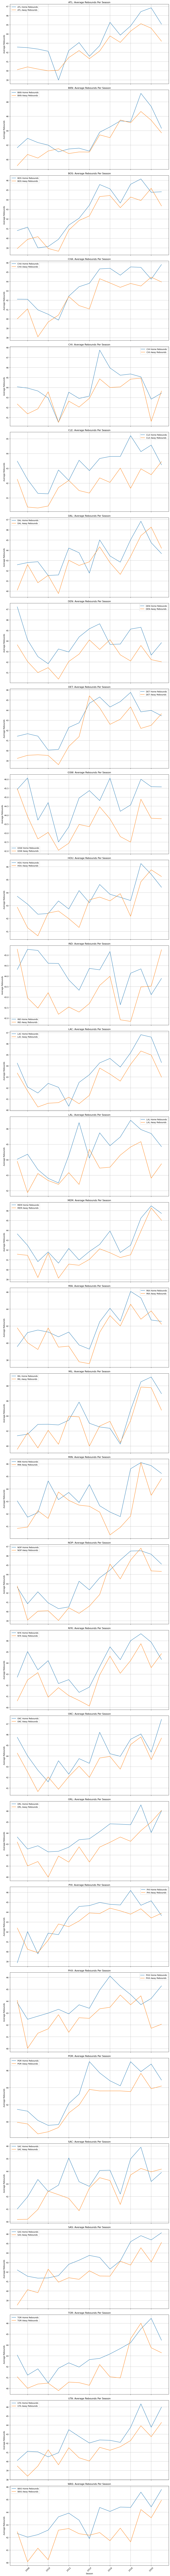

In [75]:
# Plot for each team Rebounds Variation within a season 
fig, axs = plt.subplots(len(teams), 1, figsize=(12, 6 * len(teams)), sharex=True)

for i, team in enumerate(teams):
    plot_avg_metric_per_season(filtered_df, team, 'REB_TOTAL_HOME', 'REB_TOTAL_AWAY', 'Rebounds', axs[i])

plt.tight_layout()
plt.show()

- The plot shows the variation in rebounds for NBA teams over a season, comparing home (blue) and away (orange) performances. Overall, teams exhibit fluctuating rebounding performance, with many showing minimal differences between home and away games, suggesting that location may not strongly influence their rebounding ability. However, certain teams display a consistent advantage in rebounding either at home or away, highlighting the variability in how teams handle this aspect of the game in different environments. This analysis underscores that while some teams maintain consistent rebounding, others may excel more noticeably depending on the venue.

### 3.3 Rolling Averages: Smoothing Performance Data Over Time

Rolling averages are used in this plot to smooth out fluctuations in the points scored by specific NBA teams over time, providing a clearer view of underlying trends. The rolling window (e.g., 10 games) helps in observing consistent patterns and avoiding the noise of individual game outcomes. This analysis is crucial for identifying sustained periods of high or low performance, especially when comparing home and away games.

**X-axis:** Date  
**Y-axis:** Rolling Average Points Scored  
**Lines:** Separate lines for home and away rolling averages for each team.


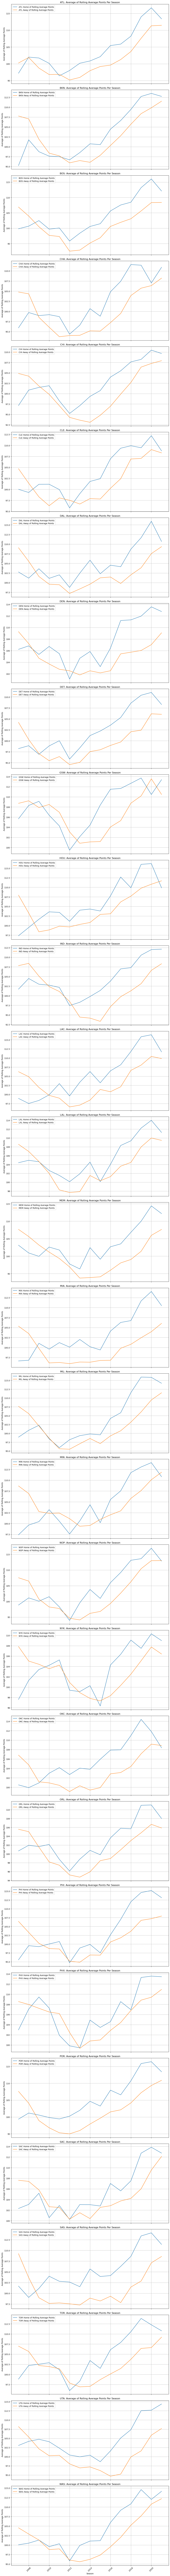

In [79]:
# Plot for each team Rolling Average Points Variation within a season 
fig, axs = plt.subplots(len(teams), 1, figsize=(12, 6 * len(teams)), sharex=True)

for i, team in enumerate(teams):
    plot_avg_metric_per_season(filtered_df, team, 'Home_PTS_RollAvg', 'Away_PTS_RollAvg', 'of Rolling Average Points', axs[i])

plt.tight_layout()
plt.show()

- These rolling average plots are designed to smooth out the fluctuations in NBA teams' performance data over time, focusing specifically on points scored during home and away games. By using a rolling window of 10 games, the plots capture trends in scoring performance, helping to reveal whether teams tend to perform better at home or on the road. The general trend across most teams indicates that scoring averages are typically higher when playing at home, suggesting a home-court advantage. 